C:\Users\royal\AppData\Local\Temp\ipykernel_26260\3824423938.py:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/royal/OneDrive/Desktop/Project Flow/data/raw/train.csv')
C:\Users\royal\AppData\Local\Temp\ipykernel_26260\3824423938.py:51: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('C:/Users/royal/OneDrive/Desktop/Project Flow/data/raw/train.csv')


/n🔍 Training Linear Regression with GridSearchCV...
Linear Regression -> MSE: 6875769.58, RMSE: 2622.17
📦 Model saved to linear_model.pkl


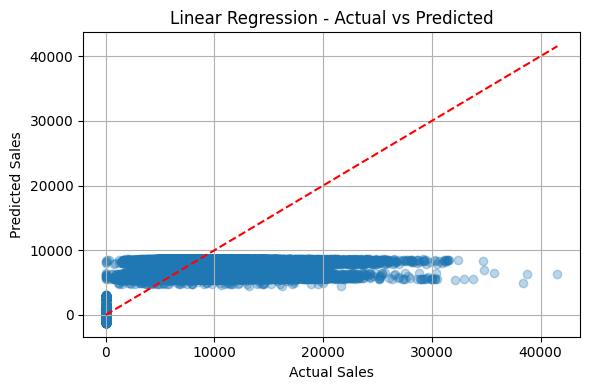

/n🔍 Training Lasso Regression with GridSearchCV...
✅ Best Params for Lasso: {'regressor__alpha': 0.01}
Lasso Regression -> MSE: 6875767.81, RMSE: 2622.17
📦 Model saved to lasso_model.pkl


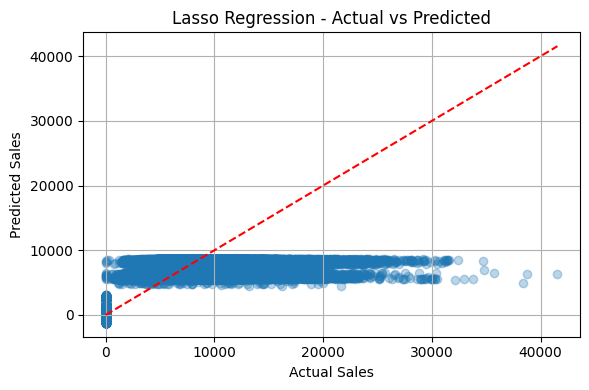

/n🔍 Training Ridge Regression with GridSearchCV...
✅ Best Params for Ridge: {'regressor__alpha': 1.0}
Ridge Regression -> MSE: 6875769.39, RMSE: 2622.17
📦 Model saved to ridge_model.pkl


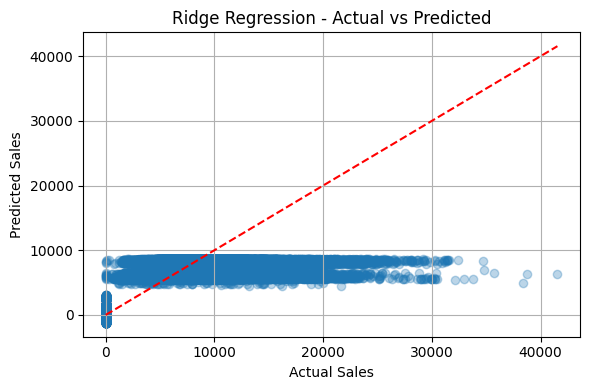

/n🔍 Training ElasticNet Regression with GridSearchCV...
✅ Best Params for ElasticNet: {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.9}
ElasticNet Regression -> MSE: 6876017.86, RMSE: 2622.22
📦 Model saved to elasticnet_model.pkl


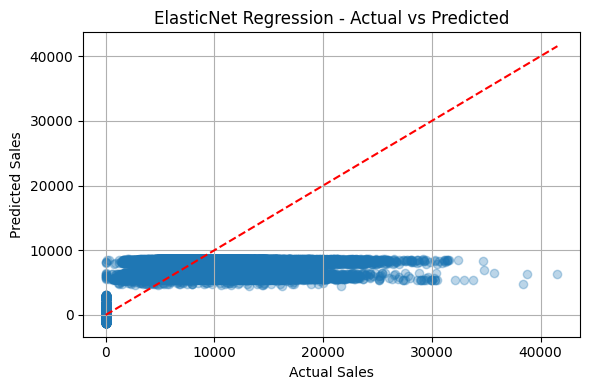

/n🔍 Training Linear Regression with GridSearchCV...
Linear Regression -> MSE: 6875769.58, RMSE: 2622.17
📦 Model saved to linear_model.pkl


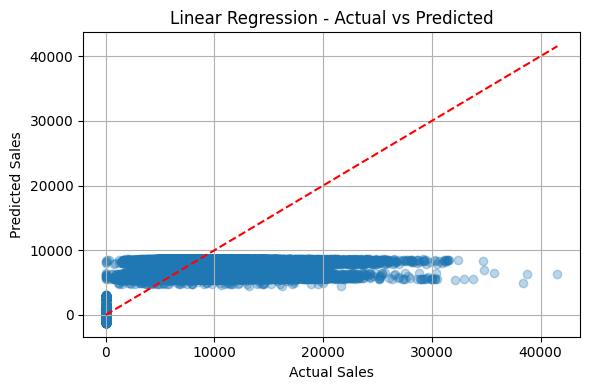

/n🔍 Training Lasso Regression with GridSearchCV...
✅ Best Params for Lasso: {'regressor__alpha': 0.01}
Lasso Regression -> MSE: 6875767.81, RMSE: 2622.17
📦 Model saved to lasso_model.pkl


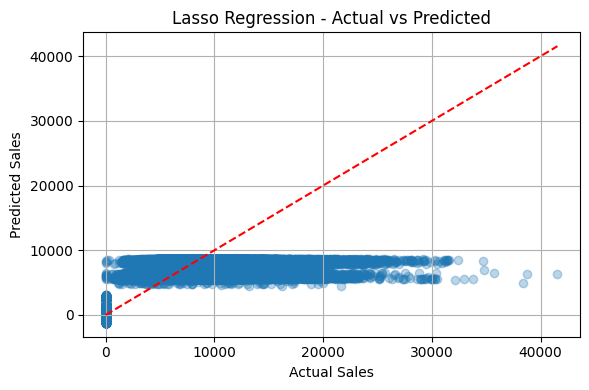

/n🔍 Training Ridge Regression with GridSearchCV...
✅ Best Params for Ridge: {'regressor__alpha': 1.0}
Ridge Regression -> MSE: 6875769.39, RMSE: 2622.17
📦 Model saved to ridge_model.pkl


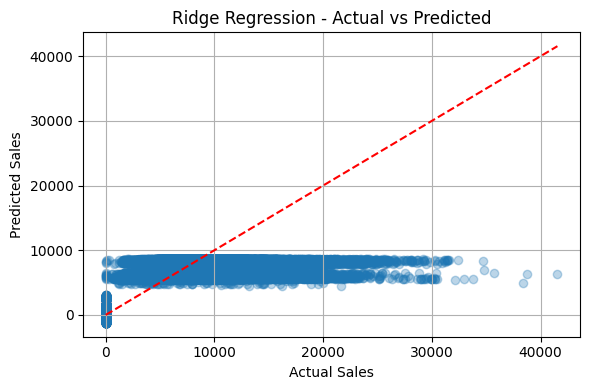

/n🔍 Training ElasticNet Regression with GridSearchCV...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# === Load Data ===
df = pd.read_csv('C:/Users/royal/OneDrive/Desktop/Project Flow/data/raw/train.csv')
df.columns = df.columns.str.strip()

# === Handle Missing Data Safely ===
if 'CompetitionDistance' in df.columns:
    df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())
if 'CompetitionOpenSinceMonth' in df.columns:
    df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(0)
if 'CompetitionOpenSinceYear' in df.columns:
    df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(0)
if 'Promo2SinceWeek' in df.columns:
    df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)
if 'Promo2SinceYear' in df.columns:
    df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0)
if 'PromoInterval' in df.columns:
    df['PromoInterval'] = df['PromoInterval'].fillna('None')

# === Drop unnecessary columns ===
df.drop(['Date', 'Customers'], axis=1, inplace=True, errors='ignore')

# === Define X and y ===
y = df['Sales']
X = df.drop('Sales', axis=1)

# === Categorical Columns ===
categorical_cols = [col for col in ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'] if col in X.columns]
for col in categorical_cols:
    X[col] = X[col].astype(str)
# preprocessing

preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# pre
# === Load all files ===
train_df = pd.read_csv('C:/Users/royal/OneDrive/Desktop/Project Flow/data/raw/train.csv')
store_df = pd.read_csv('C:/Users/royal/OneDrive/Desktop/Project Flow/data/raw/store.csv')
test_df = pd.read_csv('C:/Users/royal/OneDrive/Desktop/Project Flow/data/raw/test.csv')
sample_submission_df = pd.read_csv('C:/Users/royal/OneDrive/Desktop/Project Flow/data/raw/sample_submission.csv')

# === Clean column names (optional but recommended) ===
train_df.columns = train_df.columns.str.strip()
store_df.columns = store_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# === Merge 'store' info with both train and test ===
train_df = pd.merge(train_df, store_df, on='Store', how='left')
test_df = pd.merge(test_df, store_df, on='Store', how='left')

# === Proceed with cleaning & model training using train_df ===
df = train_df.copy()
# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Models and Hyperparameters ===
model_configs = {
    "Linear": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters for tuning
    },
    "Lasso": {
        "model": Lasso(),
        "params": {'regressor__alpha': [0.01, 0.1, 1.0, 10.0]}
    },
    "Ridge": {
        "model": Ridge(),
        "params": {'regressor__alpha': [0.01, 0.1, 1.0, 10.0]}
    },
    "ElasticNet": {
        "model": ElasticNet(),
        "params": {
            'regressor__alpha': [0.01, 0.1, 1.0, 10.0],
            'regressor__l1_ratio': [0.1, 0.5, 0.9]
        }
    }
}

# === Train, Tune, Save, Plot ===
for name, config in model_configs.items():
    print(f"/n🔍 Training {name} Regression with GridSearchCV...")

    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', config["model"])
    ])

    # Grid search if parameters exist
    if config['params']:
        grid = GridSearchCV(pipeline, config['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print(f"✅ Best Params for {name}: {grid.best_params_}")
    else:
        pipeline.fit(X_train, y_train)
        best_model = pipeline

    # Predict and Evaluate
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} Regression -> MSE: {mse:.2f}, RMSE: {rmse:.2f}")

    # Save Model
    model_path = f"{name.lower()}_model.pkl"
    with open(model_path, 'wb') as f:
        pickle.dump(best_model, f)
    print(f"📦 Model saved to {model_path}")

    # Plot Predictions
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"{name} Regression - Actual vs Predicted")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.tight_layout()
    plt.grid(True)
    plt.show()


# === Preprocessor ===
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Models and Hyperparameters ===
model_configs = {
    "Linear": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters for tuning
    },
    "Lasso": {
        "model": Lasso(),
        "params": {'regressor__alpha': [0.01, 0.1, 1.0, 10.0]}
    },
    "Ridge": {
        "model": Ridge(),
        "params": {'regressor__alpha': [0.01, 0.1, 1.0, 10.0]}
    },
    "ElasticNet": {
        "model": ElasticNet(),
        "params": {
            'regressor__alpha': [0.01, 0.1, 1.0, 10.0],
            'regressor__l1_ratio': [0.1, 0.5, 0.9]
        }
    }
}

# === Train, Tune, Save, Plot ===
for name, config in model_configs.items():
    print(f"/n🔍 Training {name} Regression with GridSearchCV...")

    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', config["model"])
    ])

    # Grid search if parameters exist
    if config['params']:
        grid = GridSearchCV(pipeline, config['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print(f"✅ Best Params for {name}: {grid.best_params_}")
    else:
        pipeline.fit(X_train, y_train)
        best_model = pipeline

    # Predict and Evaluate
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} Regression -> MSE: {mse:.2f}, RMSE: {rmse:.2f}")

    # Save Model
    model_path = f"{name.lower()}_model.pkl"
    with open(model_path, 'wb') as f:
        pickle.dump(best_model, f)
    print(f"📦 Model saved to {model_path}")

    # Plot Predictions
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"{name} Regression - Actual vs Predicted")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.tight_layout()
    plt.grid(True)
    plt.show()